In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and cleaning the dataset

In [11]:
df = pd.read_csv('/content/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')
df[df.duplicated()]

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
5,Unvalidated,2022070154696,2022,070154696,4,4,1,1,52,8,3,0,0,0,0,0,9,1,9,E01012374
6,Unvalidated,2022070154696,2022,070154696,4,5,2,1,50,8,3,0,0,2,0,0,9,-1,-1,-1
7,Unvalidated,2022070154696,2022,070154696,4,6,2,1,16,4,3,0,0,2,0,0,9,-1,-1,-1
8,Unvalidated,2022070155214,2022,070155214,2,1,1,1,74,10,2,0,0,0,0,0,1,3,5,E01018444
9,Unvalidated,2022070155656,2022,070155656,1,1,1,1,50,8,3,0,0,0,0,0,9,1,8,E01018443


In [12]:
df.columns

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [31]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# dropping unnecessary columns
df_cleaned = df.drop(['status', 'accident_index', 'accident_year', 'lsoa_of_casualty'], axis=1, inplace=False)

df_cleaned_with_misses = df_cleaned.copy()
# removing missing observations
df_cleaned = df_cleaned[(df_cleaned != -1).all(1)]
df_cleaned.head(10)

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9
1,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2
2,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10
3,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10
4,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7
5,070154696,4,4,1,1,52,8,3,0,0,0,0,0,9,1,9
8,070155214,2,1,1,1,74,10,2,0,0,0,0,0,1,3,5
9,070155656,1,1,1,1,50,8,3,0,0,0,0,0,9,1,8
10,070156916,2,1,1,1,46,8,2,0,0,0,0,0,1,1,3
11,070163458,1,1,3,1,79,11,3,5,2,0,0,0,0,1,10


In [14]:
def convert_area_type(code) :
    if code == 1:
        return 'Urban area'
    if code == 2:
        return 'Small town'
    if code == 3:
        return 'Rural'

In [20]:
def convert_class(code) :
    if code == 1:
        return 'Driver'
    if code == 2:
        return 'Passenger'
    if code == 3:
        return 'Pedestrian'

In [15]:
def convert_sex(code) :
    if code == 1:
        return 'Male'
    if code == 2:
        return 'Female'
    if code == 3:
        return 'Unknown'

In [16]:
def convert_severity(code):
    if code == 1:
        return 'Fatal'
    if code == 2:
        return 'Serious'
    if code == 3:
        return 'Slight'

In [17]:
def convert_age_band(code):
    if code == 1:
        return '0-5'
    if code == 2:
        return '6-10'
    if code == 3:
        return '11-15'
    if code == 4:
        return '16-20'
    if code == 5:
        return '21-25'
    if code == 6:
        return '26-35'
    if code == 7:
        return '36-45'
    if code == 8:
        return '46-55'
    if code == 9:
        return '56-65'
    if code == 10:
        return '66-75'
    if code == 11:
        return '75+'

In [32]:
# converting int values to meaningful strings
df_cleaned_with_misses.casualty_severity = df_cleaned_with_misses.casualty_severity.apply(convert_severity)

df_cleaned.casualty_home_area_type = df_cleaned.casualty_home_area_type.apply(convert_area_type)
df_cleaned.casualty_class = df_cleaned.casualty_class.apply(convert_class)
df_cleaned.sex_of_casualty = df_cleaned.sex_of_casualty.apply(convert_sex)
df_cleaned.casualty_severity = df_cleaned.casualty_severity.apply(convert_severity)
df_cleaned.age_band_of_casualty = df_cleaned.age_band_of_casualty.apply(convert_age_band)
df_cleaned.head(10)

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,070151244,2,1,Driver,Female,46,46-55,Slight,0,0,0,0,0,9,Urban area,9
1,070152668,1,1,Driver,Male,30,26-35,Slight,0,0,0,0,0,9,Urban area,2
2,070154696,1,1,Driver,Female,58,56-65,Slight,0,0,0,0,0,9,Urban area,10
3,070154696,2,3,Driver,Female,78,75+,Slight,0,0,0,0,0,9,Small town,10
4,070154696,3,2,Driver,Male,63,56-65,Slight,0,0,0,0,0,9,Rural,7
5,070154696,4,4,Driver,Male,52,46-55,Slight,0,0,0,0,0,9,Urban area,9
8,070155214,2,1,Driver,Male,74,66-75,Serious,0,0,0,0,0,1,Rural,5
9,070155656,1,1,Driver,Male,50,46-55,Slight,0,0,0,0,0,9,Urban area,8
10,070156916,2,1,Driver,Male,46,46-55,Serious,0,0,0,0,0,1,Urban area,3
11,070163458,1,1,Pedestrian,Male,79,75+,Slight,5,2,0,0,0,0,Urban area,10


# Visualising

In [35]:
print('Total Casualities')
print(len(df_cleaned_with_misses))

Total Casualities
61352


In [33]:
print('Fatal Casualities')
print(df_cleaned_with_misses['casualty_severity'].value_counts()['Fatal'])

print('Serious Casualities')
print(df_cleaned_with_misses['casualty_severity'].value_counts()['Serious'])

print('Slight Casualities')
print(df_cleaned_with_misses['casualty_severity'].value_counts()['Slight'])

Fatal Casualities
790
Serious Casualities
11731
Slight Casualities
48831


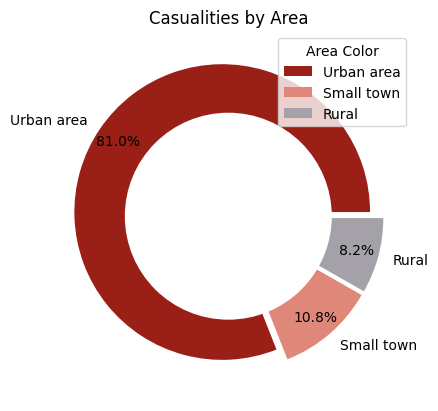

In [43]:
# colors
colors = ['#991f17', '#df8879', '#a4a2a8']

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(df_cleaned['casualty_home_area_type'].value_counts(), colors=colors, labels=df_cleaned['casualty_home_area_type'].unique(),
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Casualities by Area')

# Add Legends
plt.legend(df_cleaned['casualty_home_area_type'].unique(), loc="upper right", title="Area Color")

# Displaying Chart
plt.show()